# Clustering The Tourism Place based on city, price, and Time

We are using Kmeans with sklearn to build a package tourism place consist 3 - 5 place per package. we splice data in city each other

In [1]:
#from google.colab import files
#uploaded = files.upload()


In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.cm as cm
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load dataset

In [2]:
tourism = pd.read_csv('tourism_with_id.csv')
tourism 

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monas,Budaya,Jakarta,20000,4.6,15.0
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.0
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.0
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,NaN
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.0
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya,Surabaya,2000,4.4,45.0
433,434,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,NaN
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya,0,4.4,45.0
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,NaN


In [3]:
#tourism[tourism['City']=='Jakarta']

In [4]:
tourism.isna().sum()

Place_Id          0
Place_Name        0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
dtype: int64

In [5]:
tourism[tourism.isna().any(axis=1)]

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,NaN
6,7,Kebun Binatang Ragunan,Cagar Alam,Jakarta,4000,4.5,NaN
7,8,Ocean Ecopark,Taman Hiburan,Jakarta,180000,4.0,NaN
8,9,Pelabuhan Marina,Bahari,Jakarta,175000,4.4,NaN
9,10,Pulau Tidung,Bahari,Jakarta,150000,4.5,NaN
...,...,...,...,...,...,...,...
426,427,Patung Buddha Empat Rupa,Budaya,Surabaya,0,4.3,NaN
430,431,Taman Hiburan Rakyat,Taman Hiburan,Surabaya,5000,4.2,NaN
433,434,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,NaN
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,NaN


In [6]:
tourism.mean()

Place_Id          219.000000
Price           24594.965675
Rating              4.442792
Time_Minutes       82.609756
dtype: float64

In [7]:
tourism.fillna(tourism.mean(),inplace=True)

In [8]:
tourism.isna().sum()

Place_Id        0
Place_Name      0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
dtype: int64

In [9]:
tourism

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monas,Budaya,Jakarta,20000,4.6,15.000000
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.000000
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya,Surabaya,2000,4.4,45.000000
433,434,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,82.609756
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya,0,4.4,45.000000
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,82.609756


## Jakarta

In [10]:
jakarta_city = tourism[tourism['City']=='Jakarta']

In [11]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_jakarta = pd.get_dummies(jakarta_city, columns=["City"])

In [12]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])

In [13]:
tourism

,Place_Id,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,Monas,Budaya,Jakarta,20000,4.6,15.000000
1,2,Kota Tua,Budaya,Jakarta,0,4.6,90.000000
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,4.6,360.000000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,4.5,82.609756
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,4.5,60.000000
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya,Surabaya,2000,4.4,45.000000
433,434,Taman Bungkul,Taman Hiburan,Surabaya,0,4.6,82.609756
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya,0,4.4,45.000000
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya,0,4.6,82.609756


### select the feature which gonna use to build clustering

In [14]:
featureset_jakarta = tourism_jakarta[['Price', 'Time_Minutes']]


In [15]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_jakarta.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.02222222, 0.01428571],
       [0.        , 0.22857143],
       [0.3       , 1.        ],
       [0.01111111, 0.20745645],
       [0.10444444, 0.14285714]])

In [16]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)


[[0.         0.2154349  1.02410602 ... 0.3860742  0.27805563 0.19444474]
 [0.2154349  0.         0.82770891 ... 0.17151857 0.22322311 0.02111498]
 [1.02410602 0.82770891 0.         ... 0.66835435 0.79635084 0.84742273]
 ...
 [0.3860742  0.17151857 0.66835435 ... 0.         0.28985766 0.19262369]
 [0.27805563 0.22322311 0.79635084 ... 0.28985766 0.         0.22222222]
 [0.19444474 0.02111498 0.84742273 ... 0.19262369 0.22222222 0.        ]]


### using kmeans with sklear

In [17]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([9, 4, 5, 4, 0, 9, 4, 1, 1, 1, 4, 1, 4, 3, 4, 4, 4, 4, 8, 4, 7, 4,
       4, 4, 0, 9, 2, 4, 4, 4, 4, 4, 4, 0, 7, 2, 4, 4, 7, 4, 7, 4, 7, 9,
       1, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4,
       9, 0, 4, 6, 4, 1, 4, 7, 1, 4, 0, 4, 9, 7, 0, 7, 1, 4], dtype=int32)

In [18]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [19]:
tourism_jakarta['cluster_'] = agglom.labels_
tourism_jakarta

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Jakarta,cluster_
0,1,Monas,Budaya,20000,4.6,15.000000,1,9
1,2,Kota Tua,Budaya,0,4.6,90.000000,1,4
2,3,Dunia Fantasi,Taman Hiburan,270000,4.6,360.000000,1,5
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,10000,4.5,82.609756,1,4
4,5,Atlantis Water Adventure,Taman Hiburan,94000,4.5,60.000000,1,0
5,6,Taman Impian Jaya Ancol,Taman Hiburan,25000,4.5,10.000000,1,9
6,7,Kebun Binatang Ragunan,Cagar Alam,4000,4.5,82.609756,1,4
7,8,Ocean Ecopark,Taman Hiburan,180000,4.0,82.609756,1,1
8,9,Pelabuhan Marina,Bahari,175000,4.4,82.609756,1,1
9,10,Pulau Tidung,Bahari,150000,4.5,82.609756,1,1


In [20]:
#import matplotlib.cm as cm
#n_clusters = max(agglom.labels_)+1
#colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
#plt.figure(figsize=(16,14))

#for color, label in zip(colors, cluster_labels):
#    subset = tourism[tourism.cluster_ == label]
#    for i in subset.index:
#            plt.text(subset.Price[i], subset.Time_Minutes[i],str(subset['model'][i]), rotation=25) 
#    plt.scatter(subset.Price, subset.Time_Minutes, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
#plt.legend()
#plt.title('Clusters')
#plt.xlabel('horsepow')
#plt.ylabel('mpg')

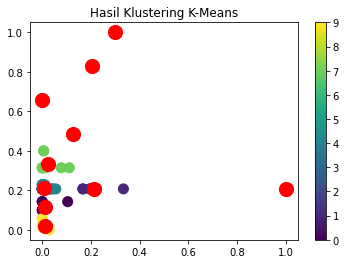

In [21]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_jakarta.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

## Bandung

In [22]:
bandung_city = tourism[tourism['City']=='Bandung']

In [23]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_bandung = pd.get_dummies(bandung_city, columns=["City"])

### select the feature which gonna use to build clustering

In [24]:
tourism_bandung

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Bandung
210,211,GunungTangkuban perahu,Cagar Alam,30000,4.5,82.609756,1
211,212,Jalan Braga,Budaya,0,4.7,82.609756,1
212,213,Gedung Sate,Budaya,5000,4.6,82.609756,1
213,214,Trans Studio Bandung,Taman Hiburan,280000,4.5,240.000000,1
214,215,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,15000,4.5,90.000000,1
215,216,Farm House Susu Lembang,Taman Hiburan,30000,4.4,82.609756,1
216,217,Kebun Binatang Bandung,Cagar Alam,20000,4.0,180.000000,1
217,218,Kawah Putih,Cagar Alam,81000,4.5,82.609756,1
218,219,Tebing Karaton,Cagar Alam,15000,4.5,82.609756,1
219,220,Dusun Bambu,Taman Hiburan,25000,4.5,82.609756,1


In [25]:
featureset_bandung = tourism_bandung[['Price', 'Time_Minutes']]

In [26]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_bandung.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.08      , 0.25052265],
       [0.        , 0.25052265],
       [0.01333333, 0.25052265],
       [0.74666667, 1.        ],
       [0.04      , 0.28571429]])

In [27]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)


[[0.         0.08       0.06666667 ... 0.04415385 0.02666667 0.05333333]
 [0.08       0.         0.01333333 ... 0.06389754 0.05333333 0.13333333]
 [0.06666667 0.01333333 0.         ... 0.05327712 0.04       0.12      ]
 ...
 [0.04415385 0.06389754 0.05327712 ... 0.         0.03519164 0.08739823]
 [0.02666667 0.05333333 0.04       ... 0.03519164 0.         0.08      ]
 [0.05333333 0.13333333 0.12       ... 0.08739823 0.08       0.        ]]


### using kmeans with sklear

In [28]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([3, 3, 3, 6, 3, 3, 1, 0, 3, 3, 3, 4, 3, 8, 8, 5, 4, 3, 0, 3, 1, 3,
       3, 9, 4, 4, 0, 3, 1, 4, 5, 3, 3, 3, 8, 5, 3, 0, 9, 0, 3, 4, 3, 4,
       1, 3, 3, 3, 4, 3, 3, 0, 3, 3, 4, 3, 0, 8, 3, 3, 4, 5, 5, 3, 1, 4,
       3, 3, 3, 3, 0, 4, 3, 3, 4, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 7, 3,
       5, 3, 8, 3, 3, 3, 3, 0, 3, 3, 3, 4, 8, 3, 3, 1, 3, 3, 4, 3, 3, 4,
       3, 3, 3, 3, 0, 3, 3, 3, 4, 0, 2, 3, 3, 0], dtype=int32)

In [29]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [30]:
tourism_bandung['cluster_'] = agglom.labels_
tourism_bandung

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Bandung,cluster_
210,211,GunungTangkuban perahu,Cagar Alam,30000,4.5,82.609756,1,3
211,212,Jalan Braga,Budaya,0,4.7,82.609756,1,3
212,213,Gedung Sate,Budaya,5000,4.6,82.609756,1,3
213,214,Trans Studio Bandung,Taman Hiburan,280000,4.5,240.000000,1,6
214,215,Taman Hutan Raya Ir. H. Djuanda,Cagar Alam,15000,4.5,90.000000,1,3
215,216,Farm House Susu Lembang,Taman Hiburan,30000,4.4,82.609756,1,3
216,217,Kebun Binatang Bandung,Cagar Alam,20000,4.0,180.000000,1,1
217,218,Kawah Putih,Cagar Alam,81000,4.5,82.609756,1,0
218,219,Tebing Karaton,Cagar Alam,15000,4.5,82.609756,1,3
219,220,Dusun Bambu,Taman Hiburan,25000,4.5,82.609756,1,3


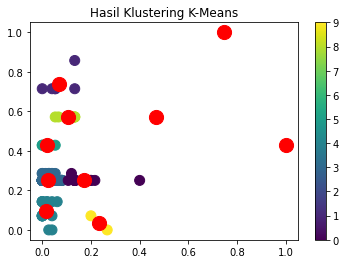

In [31]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_bandung.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

## Yogyakarta

In [32]:
yogya_city = tourism[tourism['City']=='Yogyakarta']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_yogya = pd.get_dummies(yogya_city, columns=["City"])

tourism_yogya

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Yogyakarta
84,85,Taman Pintar Yogyakarta,Taman Hiburan,6000,4.5,120.000000,1
85,86,Keraton Yogyakarta,Budaya,15000,4.6,82.609756,1
86,87,Sindu Kusuma Edupark (SKE),Taman Hiburan,20000,4.2,120.000000,1
87,88,Museum Benteng Vredeburg Yogyakarta,Budaya,3000,4.6,120.000000,1
88,89,De Mata Museum Jogja,Budaya,50000,4.4,82.609756,1
89,90,Kampung Wisata Taman Sari,Taman Hiburan,5000,4.6,82.609756,1
90,91,Situs Warungboto,Taman Hiburan,0,4.4,60.000000,1
91,92,Nol Kilometer Jl.Malioboro,Taman Hiburan,0,4.7,45.000000,1
92,93,Gembira Loka Zoo,Cagar Alam,60000,4.5,82.609756,1
93,94,Sumur Gumuling,Taman Hiburan,7000,4.5,82.609756,1


### select the feature which gonna use to build clustering

In [33]:
featureset_yogya = tourism_yogya[['Price', 'Time_Minutes']]

In [34]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_yogya.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.012     , 0.53846154],
       [0.03      , 0.3467167 ],
       [0.04      , 0.53846154],
       [0.006     , 0.53846154],
       [0.1       , 0.3467167 ]])

In [35]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.19258786 0.028      ... 0.15405401 0.19191166 0.19183869]
 [0.19258786 0.         0.19200543 ... 0.34573564 0.01       0.024     ]
 [0.028      0.19200543 0.         ... 0.15514071 0.19278507 0.19473593]
 ...
 [0.15405401 0.34573564 0.15514071 ... 0.         0.34559099 0.34587445]
 [0.19191166 0.01       0.19278507 ... 0.34559099 0.         0.014     ]
 [0.19183869 0.024      0.19473593 ... 0.34587445 0.014      0.        ]]


### using kmeans with sklear

In [36]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([6, 0, 6, 6, 8, 0, 5, 2, 8, 0, 0, 5, 9, 5, 0, 7, 0, 9, 9, 0, 9, 0,
       0, 0, 0, 0, 0, 8, 0, 2, 0, 6, 9, 4, 8, 2, 0, 0, 5, 0, 0, 0, 5, 6,
       9, 5, 0, 5, 0, 0, 0, 6, 5, 5, 2, 3, 0, 1, 5, 0, 0, 9, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 5, 5, 0, 5, 0, 0, 6, 5, 0, 0, 5,
       6, 5, 0, 8, 8, 0, 0, 6, 4, 6, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 8, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 8, 5, 6, 3, 0, 0], dtype=int32)

In [37]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [38]:
tourism_yogya['cluster_'] = agglom.labels_
tourism_yogya

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Yogyakarta,cluster_
84,85,Taman Pintar Yogyakarta,Taman Hiburan,6000,4.5,120.000000,1,6
85,86,Keraton Yogyakarta,Budaya,15000,4.6,82.609756,1,0
86,87,Sindu Kusuma Edupark (SKE),Taman Hiburan,20000,4.2,120.000000,1,6
87,88,Museum Benteng Vredeburg Yogyakarta,Budaya,3000,4.6,120.000000,1,6
88,89,De Mata Museum Jogja,Budaya,50000,4.4,82.609756,1,8
89,90,Kampung Wisata Taman Sari,Taman Hiburan,5000,4.6,82.609756,1,0
90,91,Situs Warungboto,Taman Hiburan,0,4.4,60.000000,1,5
91,92,Nol Kilometer Jl.Malioboro,Taman Hiburan,0,4.7,45.000000,1,2
92,93,Gembira Loka Zoo,Cagar Alam,60000,4.5,82.609756,1,8
93,94,Sumur Gumuling,Taman Hiburan,7000,4.5,82.609756,1,0


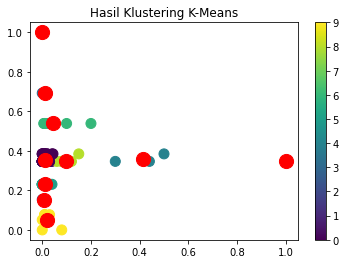

In [39]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_yogya.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

## Semarang

In [40]:
semarang_city = tourism[tourism['City']=='Semarang']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_semarang = pd.get_dummies(semarang_city, columns=["City"])

tourism_semarang

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Semarang
334,335,Candi Gedong Songo,Budaya,10000,4.5,82.609756,1
335,336,Grand Maerakaca,Taman Hiburan,15000,4.4,82.609756,1
336,337,Kampung Pelangi,Taman Hiburan,3000,4.3,30.000000,1
337,338,Lawang Sewu,Budaya,10000,4.6,82.609756,1
338,339,Sam Poo Kong Temple,Budaya,35000,4.5,82.609756,1
339,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,0,3.9,90.000000,1
340,341,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,3000,4.3,82.609756,1
341,342,Taman Kasmaran,Taman Hiburan,3000,4.5,90.000000,1
342,343,Pantai Baruna,Bahari,3000,4.0,82.609756,1
343,344,Pantai Marina,Bahari,3000,4.1,82.609756,1


### select the feature which gonna use to build clustering

In [42]:
featureset_semarang = tourism_semarang[['Price', 'Time_Minutes']]

In [43]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_semarang.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.05      , 0.39131098],
       [0.075     , 0.39131098],
       [0.015     , 0.0625    ],
       [0.05      , 0.39131098],
       [0.175     , 0.39131098]])

In [44]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.025      0.3306685  ... 0.33259083 0.23638668 0.2353931 ]
 [0.025      0.         0.33424042 ... 0.33725607 0.24031992 0.23803343]
 [0.3306685  0.33424042 0.         ... 0.015      0.09428182 0.0964122 ]
 ...
 [0.33259083 0.33725607 0.015      ... 0.         0.09702609 0.10097184]
 [0.23638668 0.24031992 0.09428182 ... 0.09702609 0.         0.0125    ]
 [0.2353931  0.23803343 0.0964122  ... 0.10097184 0.0125     0.        ]]


### using kmeans with sklear

In [45]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 9, 0, 6, 0, 0, 0, 0, 0, 0, 2, 2, 6, 0, 0, 6, 0, 0, 0, 4, 3,
       2, 0, 6, 0, 0, 0, 0, 4, 0, 5, 0, 0, 9, 8, 6, 0, 8, 0, 0, 7, 6, 8,
       0, 0, 0, 1, 8, 0, 2, 0, 8, 6, 9, 2, 2], dtype=int32)

In [46]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [47]:
tourism_semarang['cluster_'] = agglom.labels_
tourism_semarang

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Semarang,cluster_
334,335,Candi Gedong Songo,Budaya,10000,4.5,82.609756,1,0
335,336,Grand Maerakaca,Taman Hiburan,15000,4.4,82.609756,1,0
336,337,Kampung Pelangi,Taman Hiburan,3000,4.3,30.000000,1,9
337,338,Lawang Sewu,Budaya,10000,4.6,82.609756,1,0
338,339,Sam Poo Kong Temple,Budaya,35000,4.5,82.609756,1,6
339,340,Desa Wisata Lembah Kalipancur,Taman Hiburan,0,3.9,90.000000,1,0
340,341,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,3000,4.3,82.609756,1,0
341,342,Taman Kasmaran,Taman Hiburan,3000,4.5,90.000000,1,0
342,343,Pantai Baruna,Bahari,3000,4.0,82.609756,1,0
343,344,Pantai Marina,Bahari,3000,4.1,82.609756,1,0


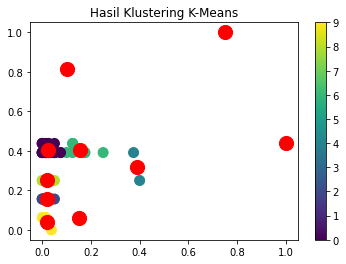

In [48]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_semarang.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

## Surabaya

In [49]:
surabaya_city = tourism[tourism['City']=='Surabaya']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_surabaya = pd.get_dummies(surabaya_city, columns=["City"])

tourism_surabaya

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Surabaya
391,392,Ekowisata Mangrove Wonorejo,Cagar Alam,0,4.3,60.000000,1
392,393,Taman Harmoni Keputih,Cagar Alam,0,4.4,60.000000,1
393,394,Air Mancur Menari,Taman Hiburan,35000,4.4,45.000000,1
394,395,Taman Prestasi,Taman Hiburan,0,4.6,82.609756,1
395,396,Monumen Kapal Selam,Budaya,15000,4.4,30.000000,1
396,397,Taman Kunang-Kunang,Taman Hiburan,0,4.4,45.000000,1
397,398,Taman Buah Surabaya,Taman Hiburan,0,4.1,30.000000,1
398,399,Taman Pelangi,Taman Hiburan,0,4.5,20.000000,1
399,400,Hutan Bambu Keputih,Cagar Alam,0,4.3,25.000000,1
400,401,Taman Keputran,Taman Hiburan,0,4.3,82.609756,1


### select the feature which gonna use to build clustering

In [50]:
featureset_surabaya = tourism_surabaya[['Price', 'Time_Minutes']]

In [51]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_surabaya.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.27272727],
       [0.        , 0.27272727],
       [0.28      , 0.18181818],
       [0.        , 0.4097561 ],
       [0.12      , 0.09090909]])

In [52]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.         0.29438829 ... 0.09090909 0.13702882 0.1586723 ]
 [0.         0.         0.29438829 ... 0.09090909 0.13702882 0.1586723 ]
 [0.29438829 0.29438829 0.         ... 0.28       0.36104805 0.30324197]
 ...
 [0.09090909 0.09090909 0.28       ... 0.         0.22793792 0.24156923]
 [0.13702882 0.13702882 0.36104805 ... 0.22793792 0.         0.08      ]
 [0.1586723  0.1586723  0.30324197 ... 0.24156923 0.08       0.        ]]


### using kmeans with sklear

In [53]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

array([6, 6, 0, 1, 0, 6, 5, 5, 5, 1, 9, 5, 8, 4, 5, 6, 3, 5, 7, 1, 1, 1,
       5, 6, 1, 1, 1, 5, 6, 1, 5, 5, 0, 4, 6, 1, 5, 5, 2, 1, 5, 6, 1, 6,
       1, 1], dtype=int32)

In [54]:
pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [56]:
tourism_surabaya['cluster_'] = agglom.labels_
tourism_surabaya

,Place_Id,Place_Name,Category,Price,Rating,Time_Minutes,City_Surabaya,cluster_
391,392,Ekowisata Mangrove Wonorejo,Cagar Alam,0,4.3,60.000000,1,6
392,393,Taman Harmoni Keputih,Cagar Alam,0,4.4,60.000000,1,6
393,394,Air Mancur Menari,Taman Hiburan,35000,4.4,45.000000,1,0
394,395,Taman Prestasi,Taman Hiburan,0,4.6,82.609756,1,1
395,396,Monumen Kapal Selam,Budaya,15000,4.4,30.000000,1,0
396,397,Taman Kunang-Kunang,Taman Hiburan,0,4.4,45.000000,1,6
397,398,Taman Buah Surabaya,Taman Hiburan,0,4.1,30.000000,1,5
398,399,Taman Pelangi,Taman Hiburan,0,4.5,20.000000,1,5
399,400,Hutan Bambu Keputih,Cagar Alam,0,4.3,25.000000,1,5
400,401,Taman Keputran,Taman Hiburan,0,4.3,82.609756,1,1


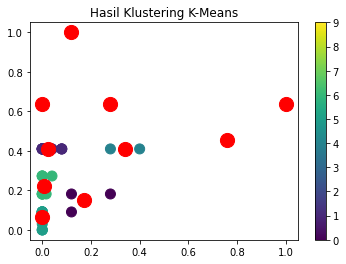

In [57]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_surabaya.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()